# practical-7

Demonstrate recurrent neural network that learns to perform sequence analysis for stock price. 


In [19]:
!pip install jovian --upgrade --quiet

In [20]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="practical-7")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..


In [6]:
pip install nsepy

  Created wheel for nsepy: filename=nsepy-0.8-cp37-none-any.whl size=36083 sha256=f7b9441ca2aa67f5cf969e11c1d87f70367890c3c5dc6b2597cbf580721abf79
  Stored in directory: /root/.cache/pip/wheels/05/2c/72/5324e267426eea65dec0c21a12a48b15887c0cf686c7a8fe11
Successfully built nsepy


In [1]:
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [2]:
train_df = pd.read_csv("https://raw.githubusercontent.com/Ramesh-Bhutka/TATA_MOTORS_PRICE_PREDICTION_DL/main/tata-motors-train-data.csv")
train_df.head()

,Date,Open,High,Low,Close
0,2019-01-01,173.5,174.20,171.3,173.45
1,2019-01-02,170.6,171.75,168.0,168.55
2,2019-01-03,169.0,170.15,165.1,166.05
3,2019-01-04,169.0,171.95,168.5,170.95
4,2019-01-07,173.2,178.20,173.2,175.35


In [3]:
train_df.shape

(497, 5)

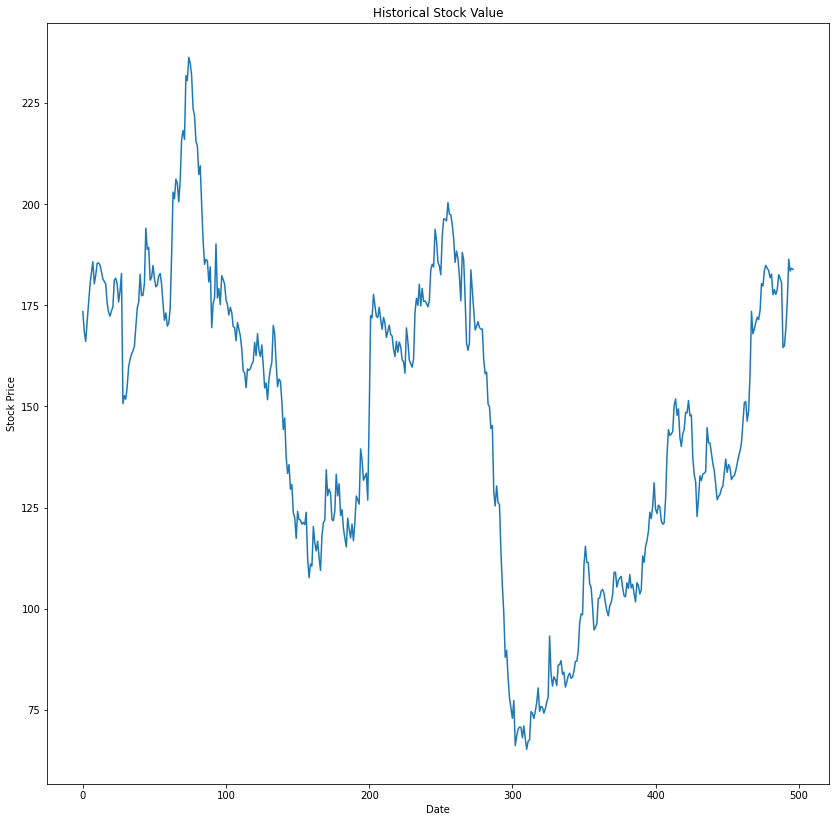

In [4]:
from matplotlib import pyplot as plt 
plt.figure(figsize=(14,14))
plt.plot(train_df['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [5]:
train_df.iloc[:, 1:2]

,Open
0,173.50
1,170.60
2,169.00
3,169.00
4,173.20
...,...
492,172.00
493,179.85
494,187.90
495,183.10


In [6]:
train_set = train_df.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 252):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [8]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
6/6 [==============================] - 6s 98ms/step - loss: 0.2768
Epoch 2/15
6/6 [==============================] - 1s 85ms/step - loss: 0.0432
Epoch 3/15
6/6 [==============================] - 1s 95ms/step - loss: 0.0400
Epoch 4/15
6/6 [==============================] - 1s 102ms/step - loss: 0.0229
Epoch 5/15
6/6 [==============================] - 1s 97ms/step - loss: 0.0245
Epoch 6/15
6/6 [==============================] - 1s 100ms/step - loss: 0.0210
Epoch 7/15
6/6 [==============================] - 1s 97ms/step - loss: 0.0196
Epoch 8/15
6/6 [==============================] - 1s 101ms/step - loss: 0.0157
Epoch 9/15
6/6 [==============================] - 1s 88ms/step - loss: 0.0179
Epoch 10/15
6/6 [==============================] - 1s 90ms/step - loss: 0.0153
Epoch 11/15
6/6 [==============================] - 1s 99ms/step - loss: 0.0181
Epoch 12/15
6/6 [==============================] - 1s 101ms/step - loss: 0.0148
Epoch 13/15
6/6 [==============================] - 1s 100

In [12]:
real_stock_price = train_df.iloc[:, 1:2].values
dataset_total = pd.concat((train_df['Open'], train_df['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(train_df) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 555):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [13]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

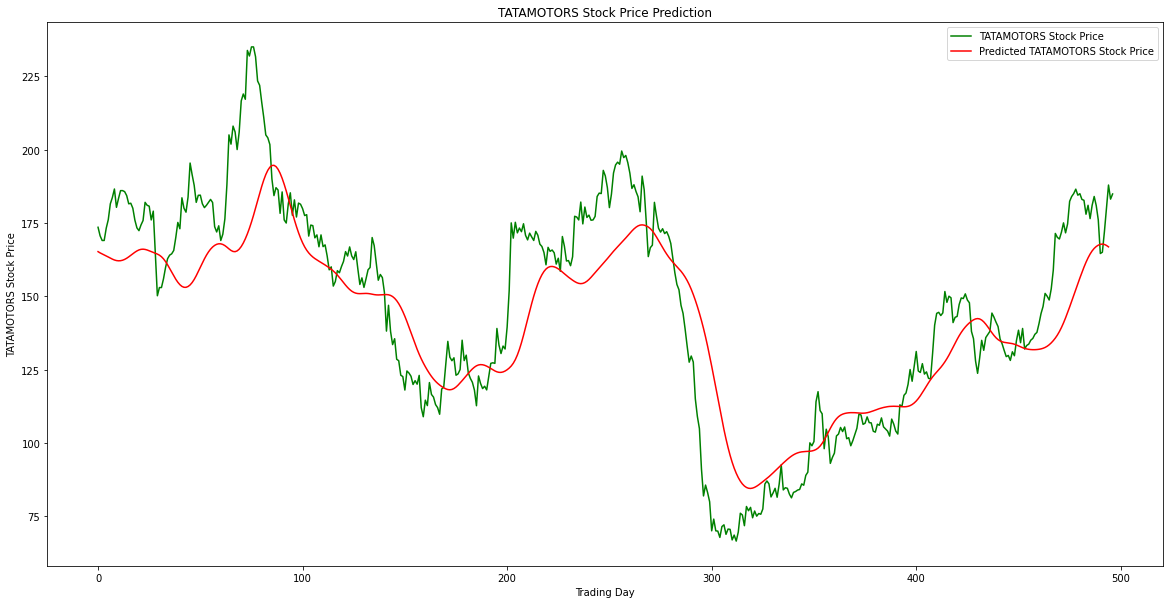

In [14]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'TATAMOTORS Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted TATAMOTORS Stock Price')
plt.title('TATAMOTORS Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('TATAMOTORS Stock Price')
plt.legend()
plt.show()

In [15]:
jovian.commit(project="practical-7")


NameError: ignored